In [1]:
%matplotlib inline

In [2]:
from astropy.table import Table

dc2_fname = "/Users/aphearin/Dropbox/protoDC2/test_mocks/dc2_z0_test1.hdf5"
dc2 = Table.read(dc2_fname, path='data')
Lbox_dc2 = 256.
print(dc2.keys())
print("\n")
agm_fname = '/Users/aphearin/Dropbox/published_age_matching/published_mr_gr_dark_side1_mock.hdf5'
agm = Table.read(agm_fname, path='data')
Lbox_agm = 250.

umachine_fname = "/Users/aphearin/Dropbox/protoDC2/umachine/mstar_1e8_cut/value_added_sfr_catalog_1.002310.hdf5"
umachine = Table.read(umachine_fname, path='data')
Lbox_um = 250.

sdss_fname = "/Users/aphearin/Dropbox/protoDC2/SDSS/sdss_magr_complete.hdf5"
# sdss_fname = "/Users/aphearin/Dropbox/SDSS_catalogs/DC2_SDSS/DC2_SDSS.hdf5"
# sdss_fname = "/Users/aphearin/Dropbox/protoDC2/volume_complete_sdss.hdf5"
sdss = Table.read(sdss_fname, path='data')
print(sdss.keys())

['source_halo_id', 'target_halo_id', 'target_halo_x', 'target_halo_y', 'target_halo_z', 'target_halo_vx', 'target_halo_vy', 'target_halo_vz', 'target_halo_mass', 'host_halo_mvir', 'upid', 'host_centric_x', 'host_centric_y', 'host_centric_z', 'host_centric_vx', 'host_centric_vy', 'host_centric_vz', 'obs_sm', 'obs_sfr', 'sfr_percentile_fixed_sm', 'x', 'vx', 'y', 'vy', 'z', 'vz', 'sdss_matched_sm', 'sdss_matched_sfr', 'sdss_matched_AbsMagu', 'sdss_matched_AbsMagg', 'sdss_matched_AbsMagr', 'sdss_matched_AbsMagi', 'sdss_matched_AbsMagz']


['specObjID', 'objID', 'ra', 'dec', 'z', 'apparent_mag_sdss_u', 'apparent_mag_sdss_g', 'apparent_mag_sdss_r', 'apparent_mag_sdss_i', 'apparent_mag_sdss_z', 'extinction_u', 'extinction_g', 'extinction_r', 'extinction_i', 'extinction_z', 'absolute_mag_sdss_u', 'absolute_mag_sdss_g', 'absolute_mag_sdss_r', 'absolute_mag_sdss_i', 'absolute_mag_sdss_z', 'has_match', 'sm', 'sfr', 'sfr_percentile_fixed_sm']


In [5]:
import rescale_dc2.matching_sdss_galaxy_selection
__=reload(rescale_dc2.matching_sdss_galaxy_selection)

# sdss_complete = sdss[sdss['sm_complete']==1]

# from slidingpercentile import sliding_percentile
# x = sdss_complete['sm']
# y = sdss_complete['sfr']
# window = 501
# sdss_complete['percentile'] = sliding_percentile(x, y, window)

In [6]:
nn_dist, nn_idx = rescale_dc2.matching_sdss_galaxy_selection.sdss_kd_tree_indices(
    dc2['obs_sm'], dc2['sfr_percentile_fixed_sm'], 
    sdss['sm'], sdss['sfr_percentile_fixed_sm'])

In [8]:
dc2['sdss_matched_sm2'] = sdss['sm'][nn_idx]
dc2['sdss_matched_sfr2'] = sdss['sfr'][nn_idx]
dc2['sdss_matched_AbsMagu2'] = sdss['absolute_mag_sdss_u'][nn_idx]
dc2['sdss_matched_AbsMagg2'] = sdss['absolute_mag_sdss_g'][nn_idx]
dc2['sdss_matched_AbsMagr2'] = sdss['absolute_mag_sdss_r'][nn_idx]
dc2['sdss_matched_AbsMagi2'] = sdss['absolute_mag_sdss_i'][nn_idx]
dc2['sdss_matched_AbsMagz2'] = sdss['absolute_mag_sdss_z'][nn_idx]


In [10]:
nd_new = np.count_nonzero(dc2['sdss_matched_AbsMagr2'] < -19)/float(Lbox_dc2**3)
nd_old = np.count_nonzero(dc2['sdss_matched_AbsMagr'] < -19)/float(Lbox_dc2**3)

nd_old, nd_new

(0.04253333806991577, 0.04496598243713379)

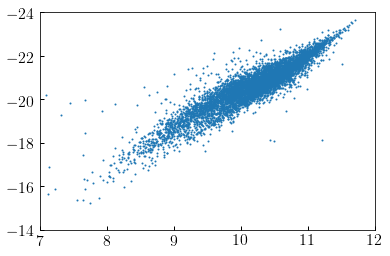

In [16]:
fig, ax = plt.subplots(1, 1)

nskip = 40
__=ax.scatter(sdss['sm'][::nskip], sdss['absolute_mag_sdss_r'][::nskip], s=1)

xlim = ax.set_xlim(7., 12)
ylim = ax.set_ylim(-14, -24)

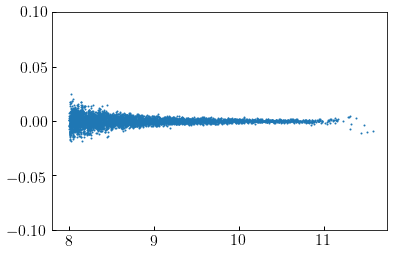

In [17]:
fig, ax = plt.subplots(1, 1)

x = np.log10(dc2['obs_sm'])
y = dc2['sdss_matched_sm2'] - np.log10(dc2['obs_sm'])

nskip = 500
__=ax.scatter(x[::nskip], y[::nskip], s=1)
ylim = ax.set_ylim(-0.1, 0.1)
xlim = ax.set_xlim(7.8, 11.75)

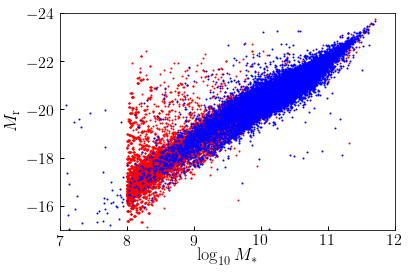

In [21]:
fig, ax = plt.subplots(1, 1)

nskip = 200
__=ax.scatter(np.log10(dc2['obs_sm'][::nskip]), 
              dc2['sdss_matched_AbsMagr2'][::nskip], s=1, color='red')

nskip_sdss = 20
__=ax.scatter(sdss['sm'][::nskip_sdss], 
              sdss['absolute_mag_sdss_r'][::nskip_sdss], s=1, color='blue')


xlim = ax.set_xlim(7, 12)
ylim = ax.set_ylim(-15, -24)
xlabel = ax.set_xlabel(r'$\log_{10}M_{\ast}$')
ylabel = ax.set_ylabel(r'$M_{\rm r}$')

# figname = 'sdss_vs_mock.png'
# fig.savefig(figname, bbox_extra_artists=[xlabel, ylabel], bbox_inches='tight')